In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

<AxesSubplot:>

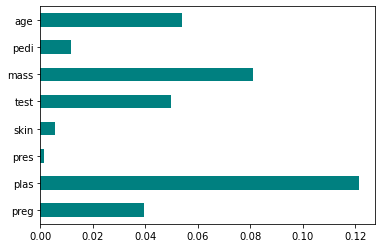

In [2]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,Y)
feat_importance = pd.Series(importance, dataframe.columns[0: len(dataframe.columns)-1])
feat_importance.plot(kind='barh', color='teal')

In [7]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [14]:
X_Cat=X.astype(int)
chi2fe = SelectKBest(chi2, k=3)
X_bestfeat = chi2fe.fit_transform(X_Cat,Y)
print(X_Cat.shape[1])
print(X_bestfeat.shape[1])

8
3


In [19]:
!pip install skfeature-chappers

<AxesSubplot:>

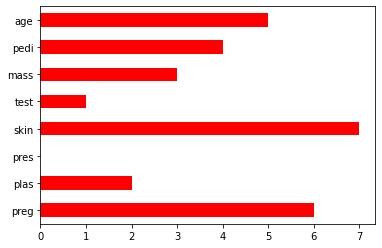

In [21]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
ranks=fisher_score.fisher_score(X,Y)
FI=pd.Series(ranks, dataframe.columns[0:len(dataframe.columns)-1])
FI.plot(kind='barh',color='red') 

<AxesSubplot:>

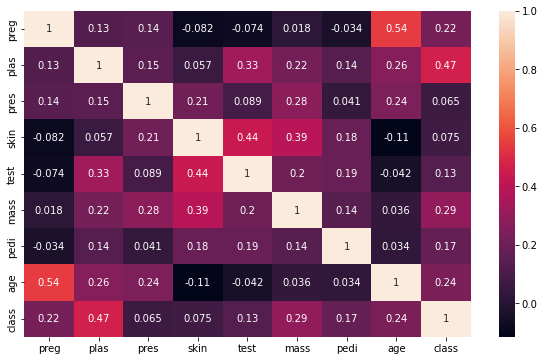

In [22]:
import seaborn as sn
cor=dataframe.corr()
plt.figure(figsize=(10,6))
sn.heatmap(cor, annot=True)

In [24]:
from sklearn.feature_selection import VarianceThreshold
X=array[:,0:8]
sel = VarianceThreshold(threshold=0)
sel.fit_transform(X)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

<BarContainer object of 8 artists>

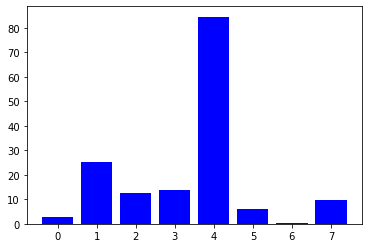

In [29]:
import numpy as np
mad=np.sum(np.abs(X-np.mean(X,axis=0)), axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mad,color='blue')

In [40]:
import sys
sys.executable

'/opt/conda/bin/python'

In [41]:
!/opt/conda/bin/python -m pip install scipy

<BarContainer object of 8 artists>

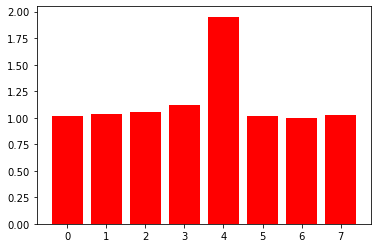

In [47]:
from scipy import stats
X=X+1
am1=np.mean(X,axis=0)
gm1=stats.gmean(X, axis=0)
#print(gm1)
dr=am1/gm1
plt.bar(np.arange(X.shape[1]),dr,color='red')

In [52]:
!pip install mlxtend

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn,k_features=3, forward=True, floating=False, verbose=2,scoring='accuracy', cv=0)
names1 = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
sfs1.fit(X,Y, custom_feature_names=names1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-02-05 09:29:26] Features: 1/3 -- score: 0.7669270833333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-02-05 09:29:26] Features: 2/3 -- score: 0.8216145833333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2022-02-05 09:29:26] Features: 3/3 -- score: 0.8229166666666666

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(n_neighbors=4),
                          k_features=3, scoring='accuracy', verbose=2)

In [61]:
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.76692708]),
  'avg_score': 0.7669270833333334,
  'feature_names': ('plas',)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.82161458]),
  'avg_score': 0.8216145833333334,
  'feature_names': ('plas', 'mass')},
 3: {'feature_idx': (1, 4, 5),
  'cv_scores': array([0.82291667]),
  'avg_score': 0.8229166666666666,
  'feature_names': ('plas', 'test', 'mass')}}